# Chapter 2 - Supervised Learning

## 2.3 Supervised Machine Learning Algorithms

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=8385ada9cb93e88d3b5decbb9b25c072a577f32e51e6fb408b1052d831aa8384
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import graphviz
import matplotlib.pyplot as plt
import mglearn
import numpy as np 
import os
import pandas as pd

from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

### 2.3.1 Some Sample Datasets

**Classification Example**

X.shape: (26, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


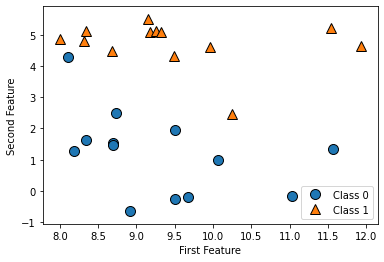

In [ ]:
#generate dataset
X, y = mglearn.datasets.make_forge()

#plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
print('X.shape:', X.shape)

*Scatter plot of the forge dataset*

**Regression Example**

Text(0, 0.5, 'Target')

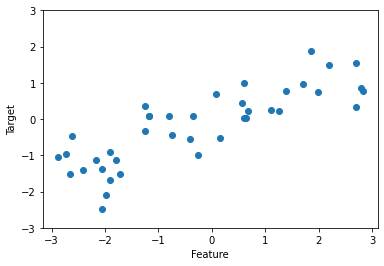

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

*Plot of the wave dataset, with the x-axis showing the feature and the y-axis showing the regression target*

In [ ]:
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print('shape of cancer data:', cancer['data'].shape)

shape of cancer data: (569, 30)


In [ ]:
print('sample counts per class:\n', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

sample counts per class:
 {'malignant': 212, 'benign': 357}


In [ ]:
print('feature names:\n', cancer['feature_names'])

feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
boston = load_boston()
print('data shape:', boston['data'].shape)

data shape: (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)

X.shape: (506, 104)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### 2.3.2 k-Nearest Neighbors

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


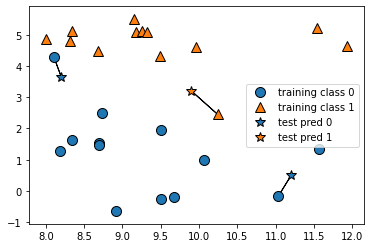

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

*Predictions made by the one-nearest-neighbor model on the forge dataset*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


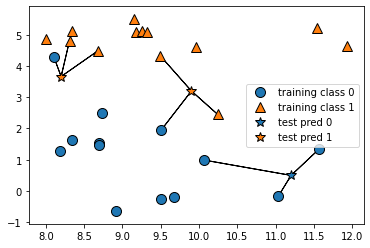

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

*Predictions made by the three-nearest-neighbors model on the forge dataset*

In [ ]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print('Test set prediction:', clf.predict(X_test))

Test set prediction: [1 0 1 0 1 0 0]


In [ ]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


**Analysing KNeighborsClassifier**

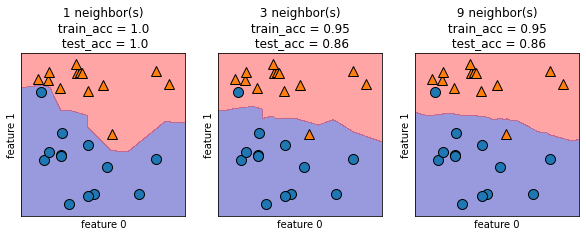

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit methods returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f' {n_neighbors} neighbor(s) \n train_acc = {round(clf.score(X_train, y_train), 2)} \n test_acc = {round(clf.score(X_test, y_test), 2)}')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

*Decision boundaries created by the nearest neighbors model for different values of `n_neighbors`*

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], 
                                                    stratify=cancer['target'], random_state=66)


In [ ]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalisation accuracy
    test_accuracy.append(clf.score(X_test, y_test))

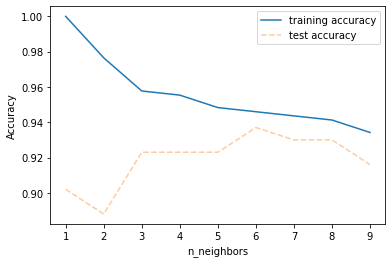

In [ ]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy', linestyle='dashed', alpha=0.4)
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

*Comparison of training and test accuracy as a function of `n_neighbors`*

**K-Neighbors Regression**

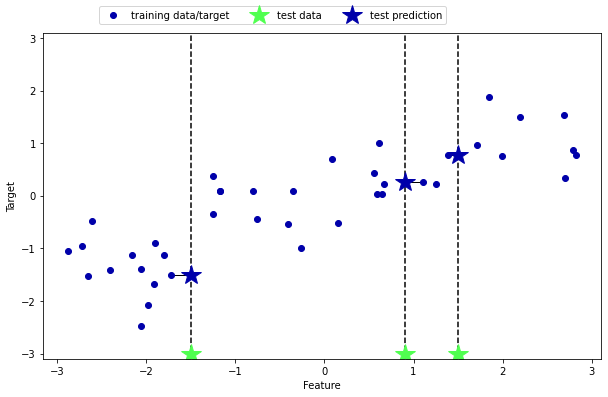

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

*Predictions made by one-nearest-neighbor regression on the wave dataset*

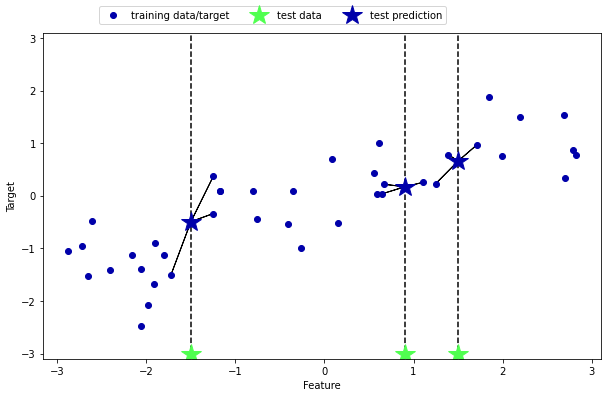

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

*Predictions made by three-nearest-neighbors regression on the wave dataset*

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3.
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print('Test set predictions:\n', reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [ ]:
print('Test set predictions:\n R^2=', round(reg.score(X_test, y_test), 2))

Test set predictions:
 R^2= 0.83


**Analysing KNeighborsRegressor**

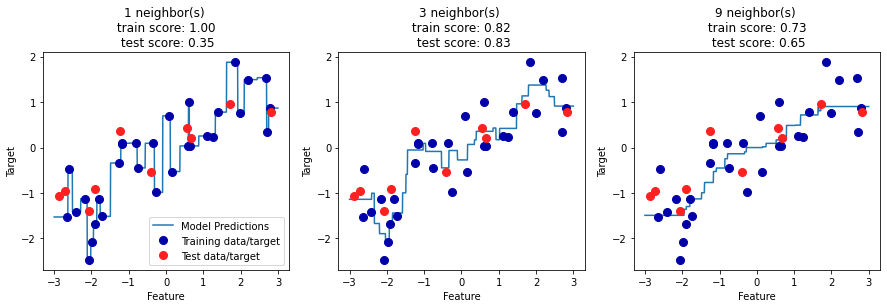

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, 'o', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'o', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s) \n train score: {:.2f} \n test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)
        )
    )
    
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(['Model Predictions', 'Training data/target',
                'Test data/target'], loc='best');

*Comparing predictions made by nearest neighbors regression for different values of `n_neighbors`*

**Strengths and Weaknesses:**

**\+** Easy to use.

**\+** Easy to interpret.

**\+** Good on simple, low dimensional data.

**\+** Performs reasonably without much adjustment.

**\-** Performs poorly on high-dimensional data.

**\-** Particulary bad on sparse datasets.

**\-** Large datasets = slow predictions

---
**Prediction time complexity:**

$O(k*n*d)$

$k$: Number of neighbours that we consider for voting.

$n$: Number of points in the training dataset.

$d$: Data Dimensionality

### 2.3.3 Linear Models

Prediction formula for a linear model:

$\hat{y}=w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b$

For a single feature:

$\hat{y}=w[0]*x[0]+b$

w[0]: 0.393906  b: -0.031804


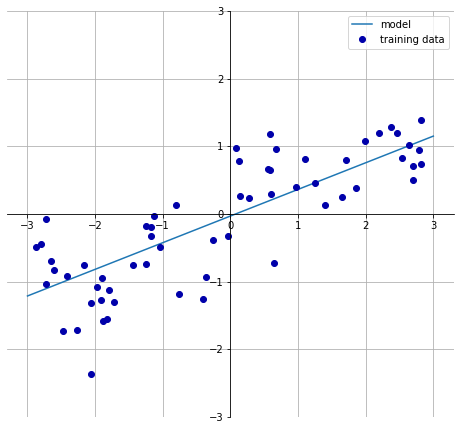

In [ ]:
mglearn.plots.plot_linear_regression_wave()

*Predictions of a linear model on the wave dataset*

**Linear regression (AKA Ordinary Least Squares [OLS])**

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print('lr.coef_', lr.coef_)
print('lr.intercept_', lr.intercept_)

lr.coef_ [0.39390555]
lr.intercept_ -0.031804343026759746


**Note:** This is the $R^2$ value

In [ ]:
print('Training set score: {:.2f}'. format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'. format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [ ]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print('Training set score: {:.2f}'. format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'. format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Linear models are prone to overfit on higher-dimensional datasets. To control the complexity of the model, use regularisation such as ridge regression or $L2$ regularisation.

**Ridge Regression**

**Note:** Mathematically, `Ridge` penalises the squared $L2$ norm of coefficients, or the Euclidean length of $w$.

In [ ]:
ridge = Ridge().fit(X_train, y_train)

print('Training set score: {:.2f}'. format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'. format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Training set score: {:.2f}'. format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'. format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('Training set score: {:.2f}'. format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'. format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


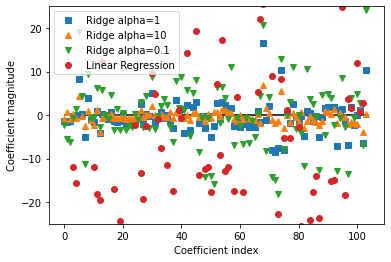

In [ ]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='Linear Regression')

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend();

*Comparing coefficient magnitudes for ridge regression with different values of alpha and linear regression*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

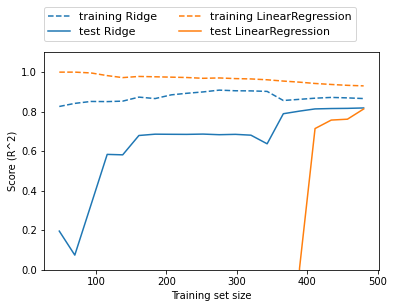

In [ ]:
mglearn.plots.plot_ridge_n_samples()

*Learning curves for ridge regression and linear regression on the Boston Housing dataset*

**Lasso**

In [ ]:
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'. format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'. format(lasso.score(X_test, y_test)))
print('Number of features used:', np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'. format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'. format(lasso001.score(X_test, y_test)))
print('Number of features used:', np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'. format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'. format(lasso00001.score(X_test, y_test)))
print('Number of features used:', np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


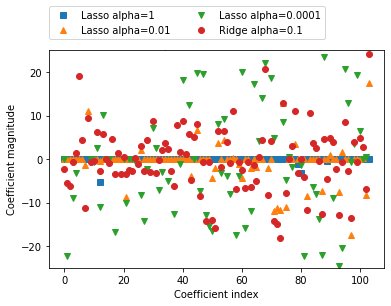

In [ ]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude');

*Comparing coefficient magnitudes for lasso regression with different values of alpha and ridge regression*

In practice, ridge regression is usually the first choice between ridge and lasso. However, if you have a large amount of features and expect only a few of them to be important, `Lasso` might be a better choice. Similarly, if you would like to have a model that is easy to interpret, `Lasso` will provide a model that is easier to understand, as it will select only a subset of the input features. `scikit-learn` also provides the `ElasticNet` class, which combines the penalties of `Lasso` and `Ridge`. In practice, this combination works best, though at the price of having two parameters to adjust: one for the `L1` regularisation, and one for the `L2` regularisation.

**Linear Models for Classification**


Linear Model for Binary Classification:

$\hat{y}=w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b>0$

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


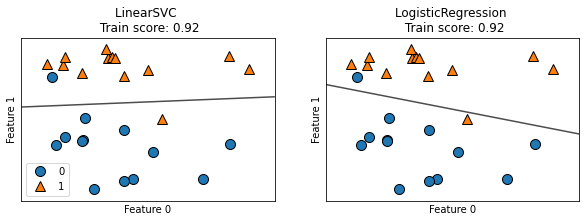

In [ ]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} \n Train score: {:.2f}'.format(clf.__class__.__name__, clf.score(X, y)))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

axes[0].legend();

*Decision boundaries of a linear SVM and logistic regression on the forge datast with default parameters*

Higher value for parameter `C`:

* The model (`linearSVC` or `LogisticRegression`) will try to fit the training set as best as possible.

* Stresses the importance that each individual data point be classified correctly.

Lower value for parameter `C`:

* The models put more emphasis on finding a coefficient vector (`w`) that is close to zero.

* Causes the algorithms to try to adjust to the "majority" of data points.

**Example:**

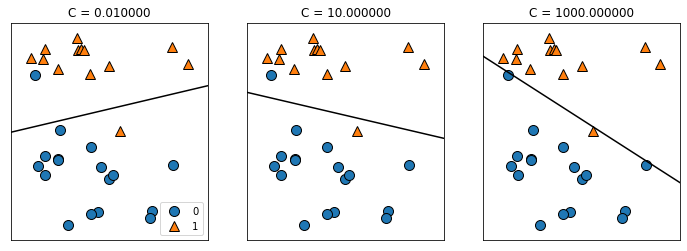

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

*Decision boundaries of a linear SVC on the forge dataset for different values of `C`*

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.944


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#`ConvergenceWarning: lbfgs failed to converge` still an issue here however.
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print('Training set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


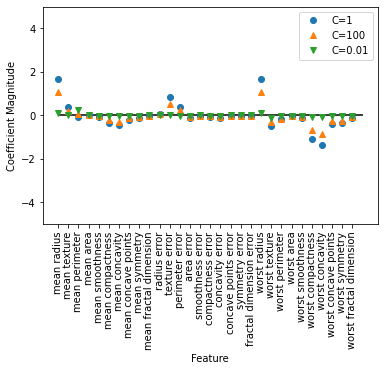

In [ ]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')

#Errata fix: Original was label='C=0.001'
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90)
plt.hlines(0, 0, cancer['data'].shape[1])
plt.ylim(-5, 5)
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.legend();

*Coefficients learned by logistic regression on the Breast Cancer dataset for different values of `C`*

In [ ]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

Training accuracy for l1 logreg with C=0.001: 0.91
Test accuracy for l1 logreg with C=0.001: 0.92
Training accuracy for l1 logreg with C=1.000: 0.96
Test accuracy for l1 logreg with C=1.000: 0.96
Training accuracy for l1 logreg with C=100.000: 0.99
Test accuracy for l1 logreg with C=100.000: 0.98


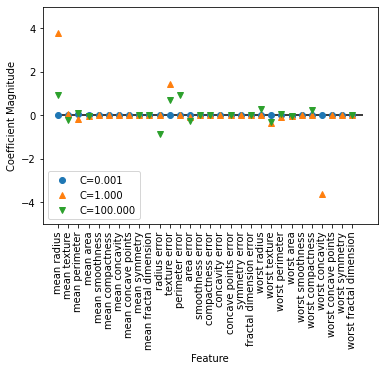

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    print('Training accuracy for l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test accuracy for l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90)
plt.hlines(0, 0, cancer['data'].shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-5, 5)
plt.legend(loc=3);

*Coefficients learned by logistic regression with L1 penalty on the Breast Cancer dataset for different values of `C`*

**Linear Models for Multi-Class Classification**

$w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b$

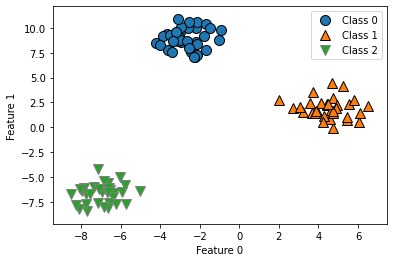

In [ ]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2']);

*Two-dimensional toy dataset containing three classes*

In [ ]:
linear_svc = LinearSVC().fit(X, y)

print('Coefficient shape:', linear_svc.coef_.shape)
print('Intercept shape', linear_svc.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape (3,)


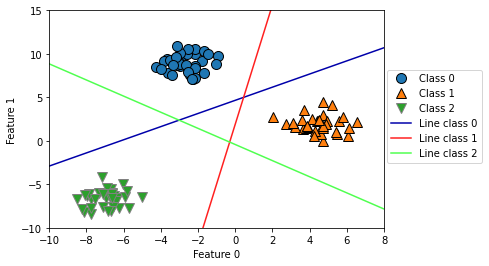

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(['Class 0', 'Class 1', 'Class 2', 
                'Line class 0', 'Line class 1', 'Line class 2'], 
               loc=(1.01, 0.3))

*Decision boundaries learned by the three one-vs.-rest classifiers*

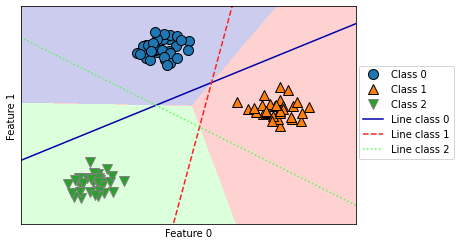

In [ ]:
mglearn.plots.plot_2d_classification(linear_svc, X, fill=True, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color, linestyle in zip(linear_svc.coef_, linear_svc.intercept_, mglearn.cm3.colors, ['-', '--', ':']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=linestyle)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 
                'Line class 0', 'Line class 1', 'Line class 2'], 
               loc=(1.01, 0.3))
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')

*Multi-Class decision boundaries derived from the three one-vs.-rest classifiers*

**Comparing regularisation in Linear models vs LinearSVC and LogisticRegression:**

* In a linear model, the regularisation parameter is $\alpha$ (alpha).
* In LinearSVC and LogisticRegression, the regularisation parameter is `C`.
* Large values for $\alpha$ or small values for `C` mean simple models.
* $\alpha$ and `C` are usually searched for on a logarithmic scale.
* Must decide between `L1 (Lasso)` or `L2 (Ridge)` regularisation:
    * If only a few features are important, use `L1`;
    * Otherwise, default to `L2`.

* `L1` is useful for interpretability as it sets the coefficient magnitude of non/low-contributive features to 0, making it easier to explain which features are most important to the model.

---

* Linear models are very fast to train, and fast to predict.
* Scale to very large datasets and work well with sparse data.
* High interpretability.
* Often perform well when the number of features is large compared to the number of samples.

### 2.3.4 Naive Bayes Classifiers

`GaussianNB`: Applied to any continuous data.

`BernoulliNB`: Assumes binary data.

`MultinomialNB`: Assumes count data.

In [ ]:
X = np.array([
              [0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]
            ])

y = np.array([0, 1, 0, 1])

In [ ]:
counts = {}

for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)

print('Feature counts: \n', counts)

Feature counts: 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


**Strengths and Weaknesses:**

* Share many strengths and weaknesses to linear models, however much simpler.
* Faster than a linear model.
* Good baseline model.
* `MultinomialNB` and `BernoulliNB` have a single parameter $\alpha$ which controls model complexity. A higher $\alpha$ smooths the model, resulting in a less complex model.
* `GaussianNB` is often used on very high-dimensional data, while the other two variants of naive Bayes are widely used  for sparse count data such as text.
* `MultinomialNB` usually performs better than `BernoulliNB`, particularly on datasets with a relatively large number of nonzero features (i.e. large documents).

### 2.3.5 Decision Trees

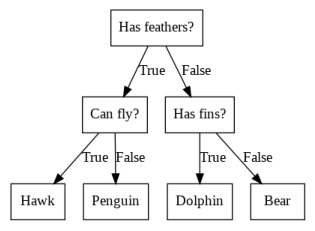

In [ ]:
mglearn.plots.plot_animal_tree()

*A decision tree to distinguish among several animals*

**Controlling Complexity of Decision Trees**

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set 1.000
Accuracy on test set 0.937


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set 0.988
Accuracy on test set 0.951


**Analysing Decision Trees**

In [ ]:
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
                feature_names=cancer['feature_names'], impurity=False, filled=True)

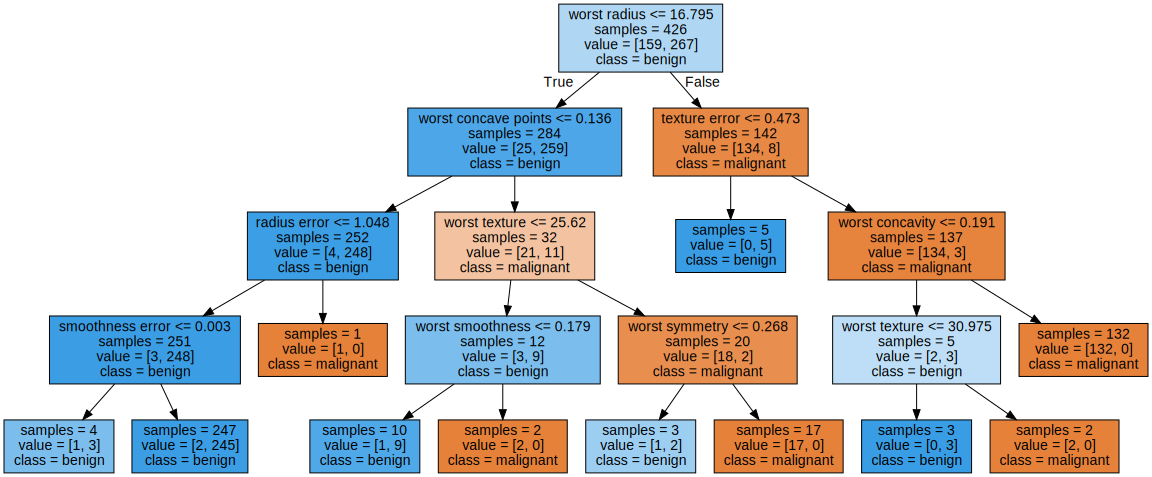

In [ ]:
with open('tree.dot') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

*Visualisation of the decision tree build on the Breast Cancer dataset*

**Feature Importance in Trees**

In [ ]:
print('feature importances: \n', tree.feature_importances_)

feature importances: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


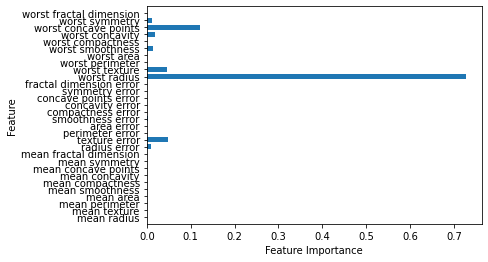

In [ ]:
def plot_features_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer['feature_names'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features);

plot_features_importances_cancer(tree)

*Feature importances computed from a decision tree learned on the Breast Cancer dataset*

Feature importances: [0. 1.]


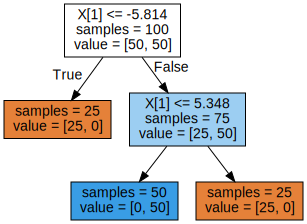

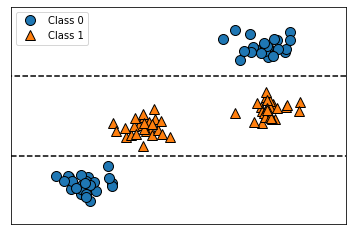

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

*A two-dimensional dataset in which the feature on the y-axis has a nonomotonous relationship with the class label, and the decision boundaries found by a decision tree*

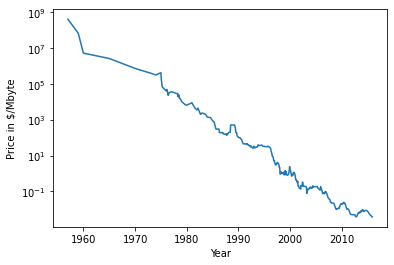

In [ ]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices['date'], ram_prices['price'])
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte');

*Historical development of the price of RAM, plotted on a log scale*

In [ ]:
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices['date'] < 2000]
data_test = ram_prices[ram_prices['date'] >= 2000]

# predict prices based on date
X_train = data_train['date'][:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train['price'])

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices['date'][:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


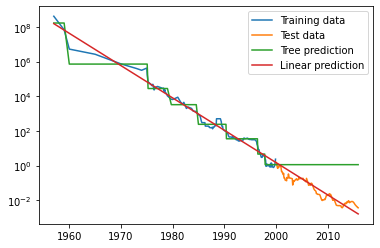

In [ ]:
plt.semilogy(data_train['date'], data_train['price'], label='Training data')
plt.semilogy(data_test['date'], data_test['price'], label='Test data')
plt.semilogy(ram_prices['date'], price_tree, label='Tree prediction')
plt.semilogy(ram_prices['date'], price_lr, label='Linear prediction')
plt.legend();

*Comparison of predictions made by a linear model and predictions made by a regression tree on the RAM price data*

**Advantages and Disadvantages:**

* Control model complexity with pre-pruning by setting parameters for `max_depth`, `max_leaf_nodes` or `min_samples_leaf` to reduce likelihood of overfitting.

* **\+** Great for model interpretability, especially for non-experts.
* **\+** Models are completly invariant to scaling of data. This is due to each feature being processed separately, and the possbile splits of the data don't depend on scaling, no preprocessing like normalisation or standardisation of features is required.
* **\+** Great for models of different scales, or a mix of binary and continuous features.
* **-** Even with pre-pruning, decision trees tend to overfit and provide poor generalisation performance.

Ensemble methods are usually used in place of a base decision tree.

### 2.3.6 Ensembles of Decision Trees

**Random Forests**

* A collection of decision trees where each tree is slightly different than the other.
* Intuition is that each tree will do a relatively good job of predicting, but will likely overfit in different ways. The amount of overfitting can be reduced by combining each of the trees and averaging their results.
* Random forests are random in two ways:
    1. Selection of data points to build a tree.
    2. Selection of features in each split test.

**Building Random Forests**

* Select data points using bootstrapping (sampling from a population with replacement)

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

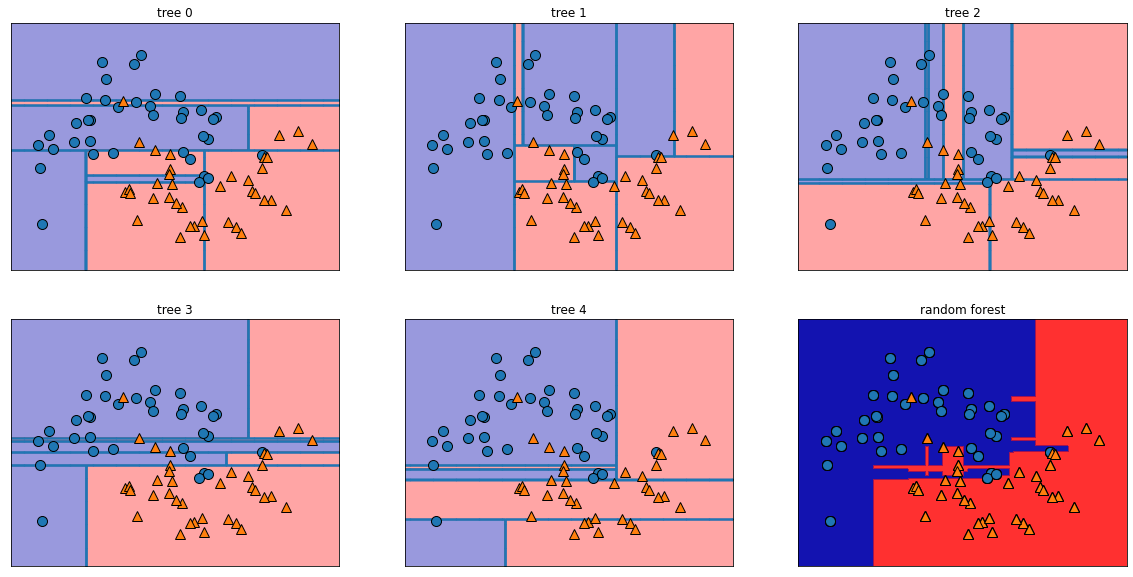

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20 ,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=0.4)
    axes[-1, -1].set_title('random forest')
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

*Decision boundaries found by five randomised decision trees and the decision boundary obtained by averaging their predicted probabilities*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


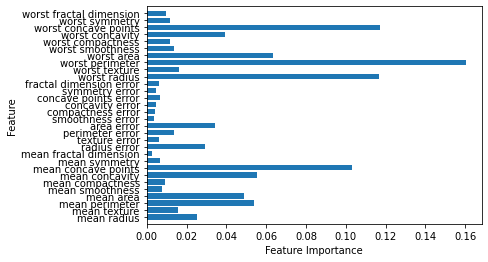

In [ ]:
plot_features_importances_cancer(forest)

*Feature importances computed from a random forest that was fit to the Breast Cancer dataset*

**Strengths and Weaknesses:**

* **\+** Often work well without heavy tuning of the parameters, and don't require scaling of the data.
* **\+** Share all the benefits of decision trees, while making up for some of their deficiencies.
* **\+** Can be expensive to train however can be parallelised across CPU cores. Use `n_jobs` to adjust the number of cores used. `n_jobs=-1` will use all available cores.
* **\+** Works well on large datasets.
* **-** Low interpretability for experts and non-experts.
* **-** Don't perform well on high-dimensional, sparse data, such as text data. Linear models are more appropriate in this case.

---

* The most important parameters to adjust are: `n_estimators`, `max_features`, and possibly pre-pruning options like `max_depth`. For `n_estimators`, larger is always better. More trees = a morerobyst ensemble by reducing overfitting.

* It's good rule of thumb use default values: `max_features=sqrt(n_features)` for classification and `max_features=n_features` for regression.

* Adding `max_features` or `max_leaf_nodes` might sometimes improve performance.


**Gradient Boosted Regression Trees (Gradient Boosting Machines)**

* Works in a serial manner; where each tree tries to correct the mistakes of the previous one.
* By default, there is no randomisation in gradient boosted regression trees. Strong pre-pruning is used instead.
* GBM tend to use very shallow trees `depth range = [1, 5]`.
* Intuition is to combine many *weak learners*. Each tree can provide good predictions on a part of the data, and so more and more trees are added to iteratively improve performance.
* Generally more sensitive than random forests for parameter tuning but can provide better accuracy if tuned correctly.
* One of the most important parameters is the `learning_rate`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Accuracy on train set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on train set: 1.000
Accuracy on test set: 0.965


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('Accuracy on train set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on train set: 0.991
Accuracy on test set: 0.972


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('Accuracy on train set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on train set: 0.988
Accuracy on test set: 0.965


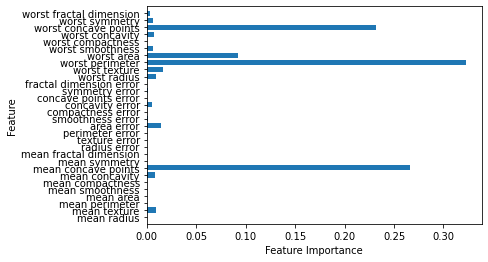

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_features_importances_cancer(gbrt)

*Feature importances computed from gradient boosting classifier that was fit to the Breast Cancer dataset*

**Strengths and Weaknesses:**

* **\+** As with other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features.
* **-** Does not work well on high-dimensional sparse data.
* **-** Require careful tuning of parameters and take a long time to train.

---

* Main parameters of GBM are the number of trees, `n_estimators` and the `learning_rate`, which controls the degree to which each tree is allowed to correct the mistakes of the previous tree.
* A lower `learning_rate` means that more trees are required to build a model of similar complexity.
* Increasing `n_estimators` increases the complexity of the model, which may lead to overfitting.
* A common practice is to fit `n_estimators` depending on the time and memory budget, and then search over different `learning_rates`.
* Use `max_depth` to reduce the complexity of each tree. Usually this parameter is set low for GBM, often not deeper than five splits.

### 2.3.7 Kernalised Support Vector Machines

**Linear Models and Non-Linear Features**

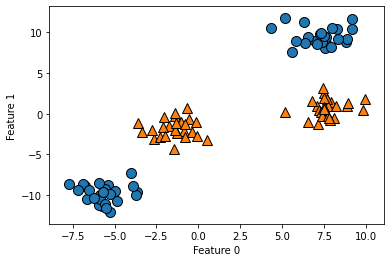

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Two-class classification dataset in which classes are not linearly separable*

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


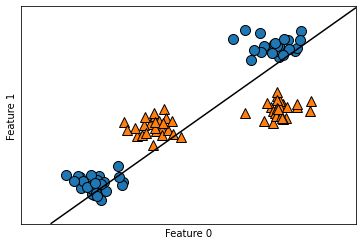

In [ ]:
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Decision boundary found by a linear SVM*

Text(0.5, 0, 'feature1**2')

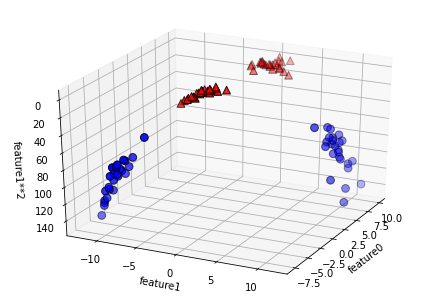

In [ ]:
# add the squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])
figure = plt.figure()

# visualise in 3D
ax = Axes3D(figure, elev=-152, azim=-26)

# plot first all the points with y == 0, then all with y == 1
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2')

*Expansion of the previous visualisation, created by adding a third feature derived from feature1*

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


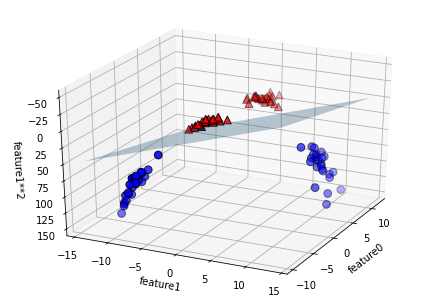

In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2');

*Decision boundary found by a linear SVM on the expanded three-dimensional dataset*

Text(0, 0.5, 'Feature 1')

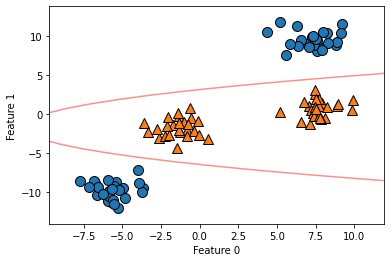

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function   (np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

*The decision boundary from the previous visualisation as a function of the original two features*

**The Kernel Trick**

* Adding non-linear features to the representation of our data can make linear models much more powerful.

* The *kernel trick* allows us to learn a classifier in a higher-dimensional space without actually computing the new, possibly very large representation.

* The *kernel trick* computes the distance of the data points for the expanded feature representation, without ever actually computing the expansion.

* There are two main ways to map your data into a higher-dimensional space:
    1. The `polynomial kernel`, which computes all possible polynomials up to a certain degree of the original features (like feature1 ** 2 * feature2 ** 5);
    2. and the `radial basis function (RBF) kernel`, also known as the `Gaussian kernel` which corresponds to an infinite-dimensional feature space. It considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees.

**Understanding SMVs**

The distance between data points is measured by the Gaussian kernel:

$k_{rbf}(x_1,x_2)=exp(-\gamma||x_1-x_2||^2)$

Where:

$x_1$ and $x_2$ are data points

$||x_1 - x_2||$ denotes Euclidean distance

$\gamma$ is a parameter that controls the width of the Gaussian kernel

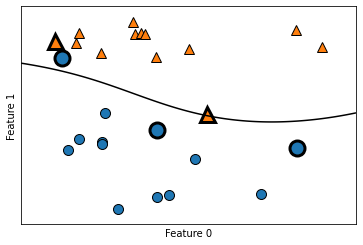

In [ ]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Decision boundary and support vectors found by an SVM with RBF kernel*

**Tuning SVM Parameters**

* $\gamma$ determines how far the influence of a single training example reaches, with low values meaning corresponding to a far reach, and high values to a limited reach. The wider the radius of the Gaussian kernel, the further the influence of each training example.

* $C$ is a regularisation parameter, similar to that used in the linear models. It limits the importance of each point.

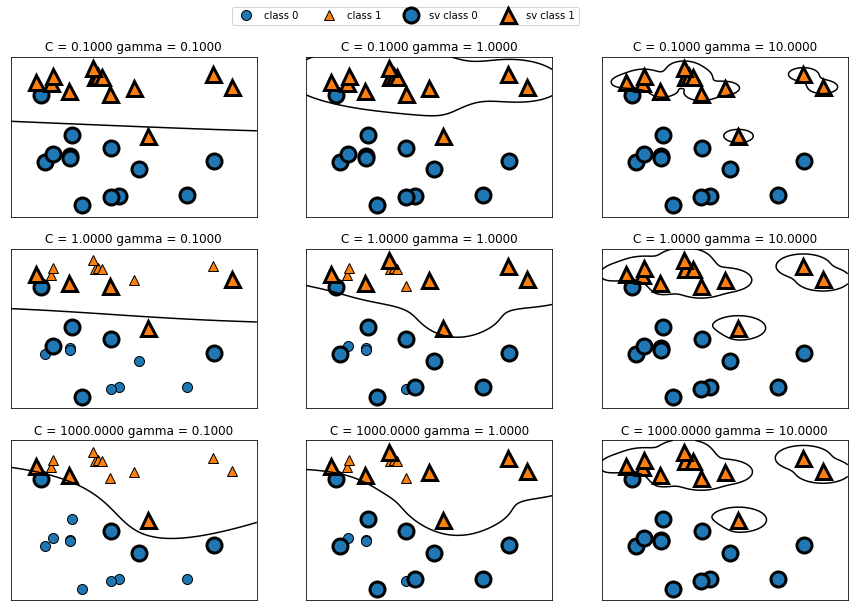

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'],
                    ncol=4, loc=(0.9, 1.2))

*Decision boundaries and support vectors for different settings of the parameters $C$ and $\gamma$*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
# Added arguments to better align to output produced in book. train=1 and test=0.63
svc = SVC(C=1, gamma=1/X_train.shape[0])
svc.fit(X_train, y_train)

print('Accuracy on training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.89


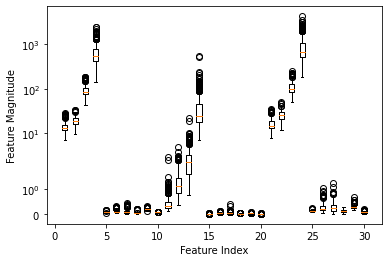

In [ ]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude');

*Feature ranges for the Breast Cancer dataset (note that the y axis has a logarithmic scale)*

The kernel SVM is extremely prone to data on different orders of magnitude. To fix this, we must rescale our features.

**Preprocessing Data for SVMs**

* Rescale each feature so that they are all approximately on the same scale.

In [ ]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print('Minimum value for each feature:\n', X_train_scaled.min(axis=0))
print('Maximum value for each feature:\n', X_train_scaled.max(axis=0))

Minimum value for each feature:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum value for each feature:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# use THE SAME transformation on the test set
# using min and range of the training set (see Chapter 3 for details)
x_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(x_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(x_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


**Strengths and Weaknesses:**

*  **\+** Allow for complex decision boundaries, even if the data has only a few features.
* **\+** Work well on low-dimensional and high-dimensional data.
* **-** Does not scale well as the number of samples increase.
* **-** Require careful preprocessing of data and tuning of parameters.
* **-** Difficult to inspect, understand why a particular prediction was made, and it might be difficult to explain to a non-expert.
---

* People tend to use tree-based models such as Random Forests or Gradient Boosting instead.
* Best used when all of your features represent measurements in similar units and they are on similar scales.

### 2.3.8 Neural Networks (Deep Learning)

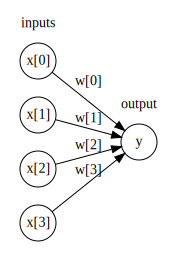

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

*Visualisation of logistic regression, where input features and predictions are shown as nodes, and the coefficients are connections between the nodes*

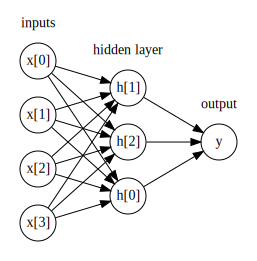

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

*Illustration of a multilayer perceptron with a single hidden layer*

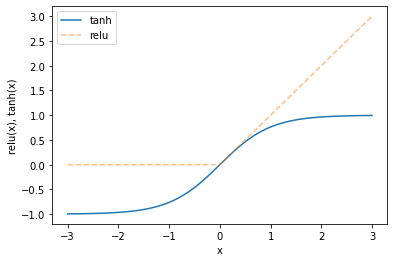

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu', linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)');

*The hyperbolic tangent activation function and the rectified linear activation function*

$h[0] = tanh(w[0,0]*x[0]+w[1,0]*x[1]+w[2,0]*x[2]+w[3,0]*x[3]+b[0])$

$h[1] = tanh(w[0,1]*x[0]+w[1,1]*x[1]+w[2,1]*x[2]+w[3,1]*x[3]+b[1])$

$h[2] = tanh(w[0,2]*x[0]+w[1,2]*x[1]+w[2,2]*x[2]+w[3,2]*x[3]+b[2])$

$\hat{y}=v[0]*h[0]+v[1]*h[1]+v[2]*h[2]+b$

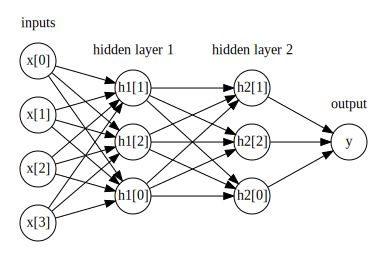

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

*A multilayer perceptron with two hidden layers*

**Tuning Neural Networks**

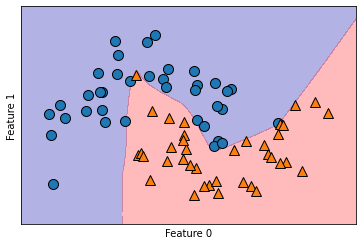

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Decision boundary learned by a neural network with 100 hidden units on the two_moons dataset*

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


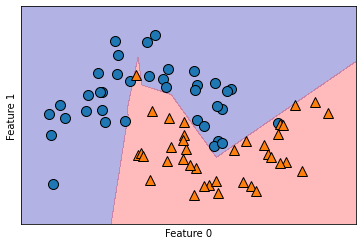

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Decision boundary learned by a neural network with 10 hidden units on the two_moons dataset*

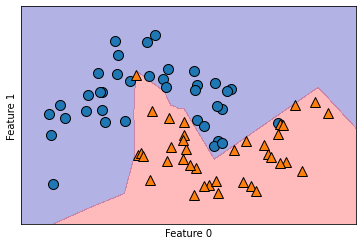

In [ ]:
# using 2 hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Decision boundary learned using 2 hidden layers with 10 hidden units each, with rect activation function*

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


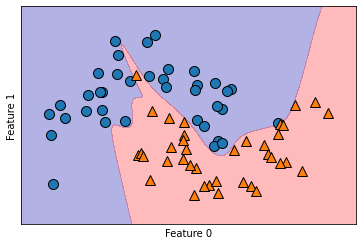

In [ ]:
# using 2 hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Decision boundary learned using 2 hidden layers with 10 hidden units each, with tanh activation function*

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


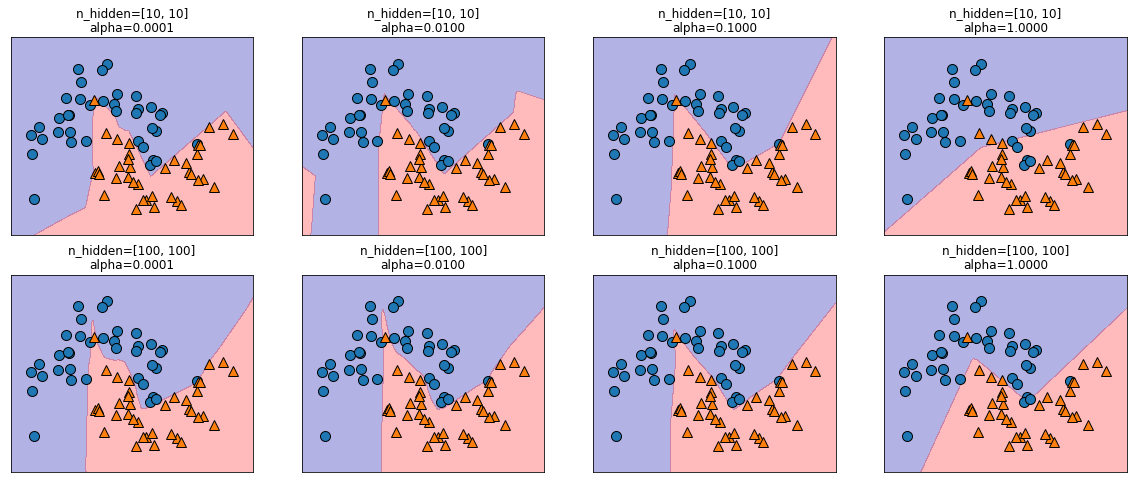

In [ ]:
fix, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

*Decision functions for different numbers of hidden units and different settings of the alpha parameter*

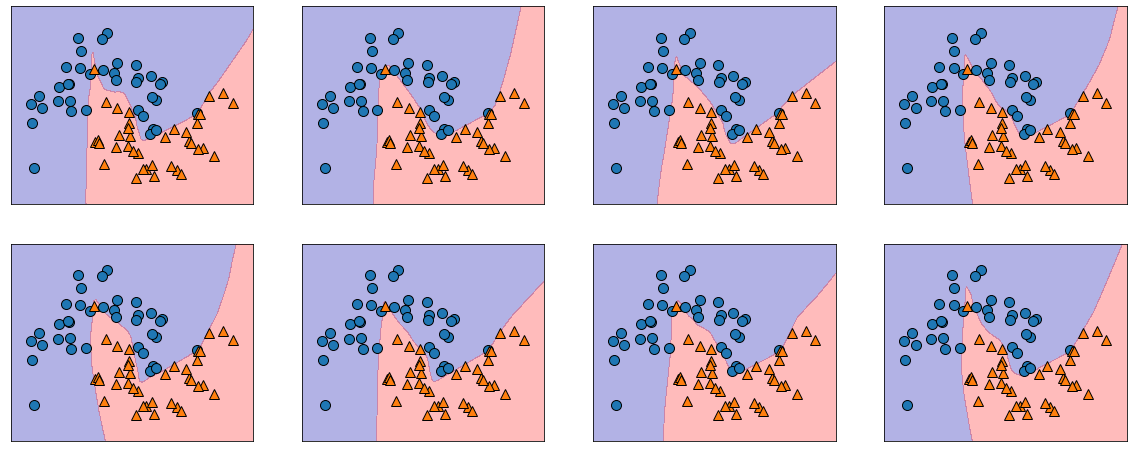

In [ ]:
fix, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

*Decision functions learned with the same parameters but different random initialisations*

In [ ]:
print('Cancer data per-feature maxima:\n{}'.format(cancer['data'].max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy on training set: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [ ]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)

# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use THE SAME transformation on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


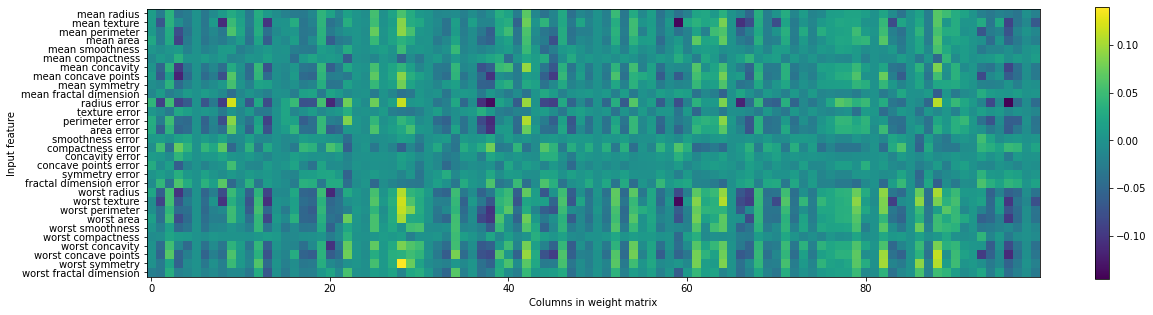

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer['feature_names'])
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar();

*Heat map of the first layer weights in a neural network learned on the Breast Cancer dataset*

**Strengths and Weaknesses:**

* **\+** Can capture information contained in large amounts of data and build complex models.
* **\+** Given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms.
* **-** Takes a LONG time to train.
* **-** Require careful preprocessing of data.
* **-** Tend to only work best with homogeneous data, where all features have similar meanings. Tree-based models tend to work better in this case.

## 2.4 Uncertainty Estimates from Classifiers

In [ ]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes 'blue' and 'red' for illustration purposes
y_named = np.array(['blue', 'red'])[y]

# we can call train_test_split with arbitrarily many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1 Decision Function

In [ ]:
print('X_test.shape: {}'.format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [ ]:
# show the first few entries of decision_function
print('Decision function:', gbrt.decision_function(X_test)[:6])

Decision function: [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [ ]:
print('Thresholded decision function:\n', gbrt.decision_function(X_test) > 0)
print('Predictions:\n', gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [ ]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]

# pred is the same as the output of gbrt.predict
print('pred is equal to predictions:', np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [ ]:
decision_function = gbrt.decision_function(X_test)
print('Decision function minimum {:.2f}\nDecision function maximum {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

Decision function minimum -7.69
Decision function maximum 4.29


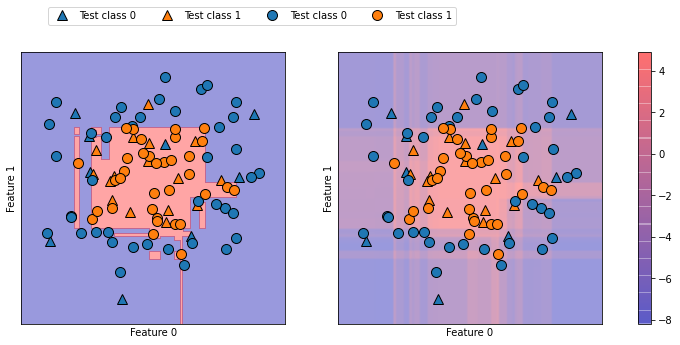

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Test class 0', 'Test class 1'], ncol=4, loc=(0.1, 1.1));

*Decision boundary (left) and decision function (right) for a gradient boosting model on a two-dimensional toy dataset*

### 2.4.2 Predicting Probabilities

In [ ]:
print('shape of probabilities', gbrt.predict_proba(X_test).shape)

shape of probabilities (25, 2)


In [ ]:
# show the first few entries of predict_proba
print('predicted probabilities:\n', gbrt.predict_proba(X_test[:6]))

predicted probabilities:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


A model that is more overfitted tends to make more certain predictions, even if they might be wrong. A model with less complexity usually has more uncertainty in its predictions. A model is called *calibrated* if the reported uncertainty actually matches how correct it is - in a calibrated model, a prediction made with 70% certainty would be correct 70% of the time.

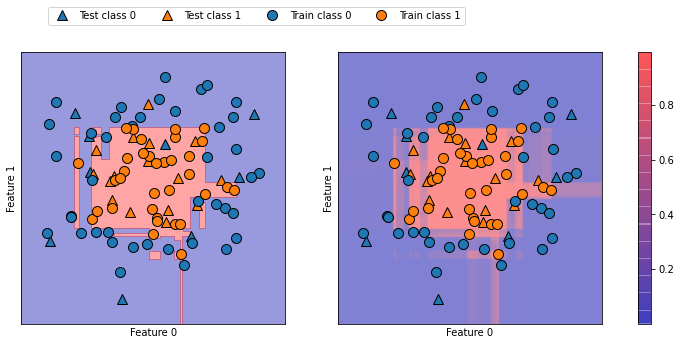

In [ ]:
fix, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2
)

scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=0.5, cm=mglearn.ReBl, function='predict_proba'
)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 
                'Train class 1'], ncol=4, loc=(0.1, 1.1));

*Decision boundary (left) and predicted probabilities for the gradient boosting model in the previous figure*

### 2.4.3 Uncertainty in Multiclass Classification

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [ ]:
print('Decision function shape:', gbrt.decision_function(X_test).shape)

# plot the first few entries of the decision function
print('Decision function:\n', gbrt.decision_function(X_test)[:6, :])

Decision function shape: (38, 3)
Decision function:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [ ]:
print('Argmax of decision function:\n', np.argmax(gbrt.decision_function(X_test), axis=1))
print('Predictions:\n', gbrt.predict(X_test))

Argmax of decision function:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
# show the first few entries of predict_proba
print('Predicted probabilities:\n', gbrt.predict_proba(X_test)[:6])

# show that sums across rows are one
print('Sums:', gbrt.predict_proba(X_test)[:6].sum(axis=1))

Predicted probabilities:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [ ]:
print('Argmax of predicted probabilities:\n', np.argmax(gbrt.predict_proba(X_test), axis=1))
print('Predictions:\n', gbrt.predict(X_test))

Argmax of predicted probabilities:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print('unique classes in training data:', logreg.classes_)
print('predictions:', logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('argmax of decision functions', argmax_dec_func[:10])
print('argmax combined with classes_:', logreg.classes_[argmax_dec_func][:10])

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision functions [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**SUPERVISED LEARNING: WHEN TO USE EACH MODEL**

* *Nearest Neighbors:* For small datasets, good as a baseline, easy to explain.
* *Linear Models:* Go-to as a first algorithm to try, good for very large datasets, good for very high-dimensional data.
* *Naive Bayes:* Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models.
* *Decision Trees:* Very fast, don't need scaling of the data, can be visualised and easily explained.
* *Random Forests:* Nearly always perform better than a single decision tree, very robust and powerful. Don't need scaling of data. Not good for high-dimensional sparse data.
* *Gradient Boosted Decision Trees:* Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.
* *Support Vector Machines:* Powerful for medium-sized datasets with similar meaning. Require scaling of data, sensitive to parameters.
* *Neural Networks:* Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train.